In [1]:
import numpy as np
import matplotlib.pyplot as pl
import qnm
import matplotlib
mplparams = {
    'text.usetex': True,
    'axes.linewidth': 1,
    'lines.linewidth' : 1.5,
    'axes.grid': False,
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 26,
    'figure.figsize': (10,8),
    'legend.fontsize': 26,
    'legend.handlelength' : 2,
    'legend.numpoints' : 1,
    'axes.grid' : True,
    'grid.alpha' : 0.3,
}
matplotlib.rcParams.update(mplparams)

red = '#D60606'
blue = '#0083DE'
green = '#00BA75'
yellow = '#FFC61E'
purple = '#A433B3'
orange = '#FD882E'
color_arr = [red, blue, green, yellow, purple, orange]

In [2]:
data = np.loadtxt("results/O4_design_overfiltered_220+221:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
BF = (evidence_filt-evidence_inj)/np.log(10)
# thresh_arr = []
# std_arr = []
# idx_arr = range(len(BF))
# for i in idx_arr:
#     temp = BF[0:i+1]
#     thresh = np.quantile(temp, 0.99)
#     thresh_arr.append(thresh)
    
# thresh_arr = np.asarray(thresh_arr)
# pl.plot(idx_arr, thresh_arr)
# pl.xlabel("Simulation number")
# pl.ylabel("BF threshold")

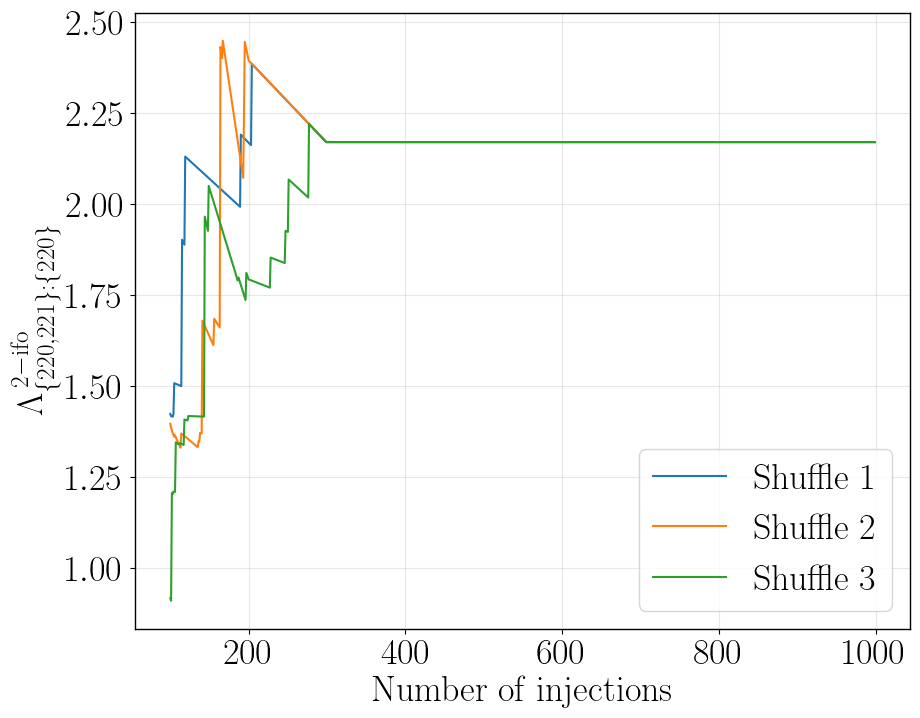

In [17]:
for idx0 in range(3):
    np.random.shuffle(BF)
    thresh_arr = []
    idx_arr = np.arange(900)
    for idx1 in idx_arr:
        temp = BF[0:1+idx1]
        thresh = np.quantile(temp, 0.99)
        thresh_arr.append(thresh)
    pl.plot(idx_arr+100, thresh_arr, label = f"Shuffle {idx0+1}")

pl.xlabel("Number of injections")
pl.ylabel(r"$\Lambda_{\{220,221\}:\{220\}}^{\rm \: 2-ifo}$")
pl.legend()
pl.savefig("plots/BFthresh_simulation_number.pdf")